In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sbody = '2001 FO185'
objname = '2001FO185'
dt=500.
#path = 'Asteroids/'+objname
path = 'TNOs/'+objname
series = pd.read_csv(path+'/series_new.csv')

t = series['t'].values
a = series['a'].values
e = series['e'].values
inc = series['inc'].values*np.pi/180
omega = series['omega'].values*np.pi/180
Omega = series['Omega'].values*np.pi/180
M = series['M'].values*np.pi/180
h = np.sin(inc)*np.sin(Omega)
k = np.sin(inc)*np.cos(Omega)
p = e*np.sin(Omega+omega)
q = e*np.cos(Omega+omega)

hj = series['hj'].values
kj = series['kj'].values
pj = series['pj'].values
qj = series['qj'].values

hs = series['hs'].values
ks = series['ks'].values
ps = series['ps'].values
qs = series['qs'].values

hn = series['hn'].values
kn = series['kn'].values
pn = series['pn'].values
qn = series['qn'].values

hu = series['hu'].values
ku = series['ku'].values
pu = series['pu'].values
qu = series['qu'].values

plt.scatter(t,h)
plt.show()
plt.scatter(t,h-np.sin(t))

FileNotFoundError: [Errno 2] No such file or directory: 'TNOs/2001FO185/series_new.csv'

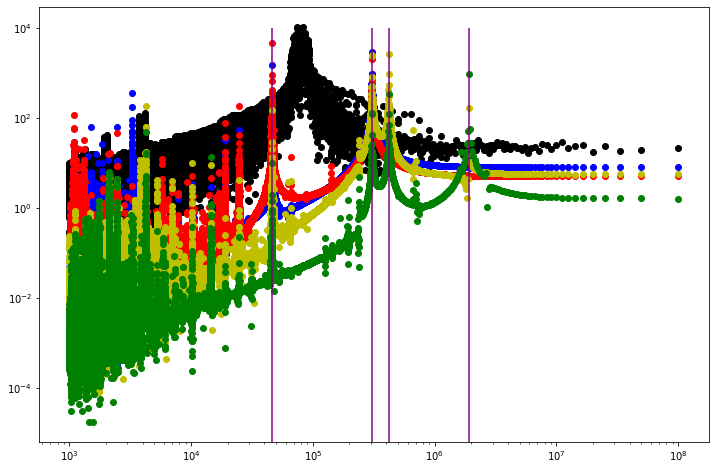

In [16]:
pYh = np.abs(np.fft.rfft(h))
pYhj = np.abs(np.fft.rfft(hj))
pYhs = np.abs(np.fft.rfft(hs))
pYhu = np.abs(np.fft.rfft(hu))
pYhn = np.abs(np.fft.rfft(hn))

ihumax = np.argmax(pYhu[1:])+1
ihnmax = np.argmax(pYhn[1:])+1 
ihsmax = np.argmax(pYhs[1:])+1 
ihjmax = np.argmax(pYhj[1:])+1 

n = len(h)
freq = np.fft.rfftfreq(n,d=dt)
plt.figure(figsize=(12,8))
xs = [1,10000]
plt.vlines(x = [1/freq[ihumax], 1/freq[ihnmax], 1/freq[ihsmax], 1/freq[ihjmax]], ymin = 0, ymax = max(xs),
           colors = 'purple',
           label = 'vline_multiple - full height')
plt.scatter(1/freq[1:],pYh[1:],label='particle',c='k')
plt.scatter(1/freq[1:],pYhj[1:],label='particle',c='b')
plt.scatter(1/freq[1:],pYhs[1:],label='particle',c='r')
plt.scatter(1/freq[1:],pYhu[1:],label='particle',c='y')
plt.scatter(1/freq[1:],pYhn[1:],label='particle',c='g')
plt.xscale('log')
plt.yscale('log')

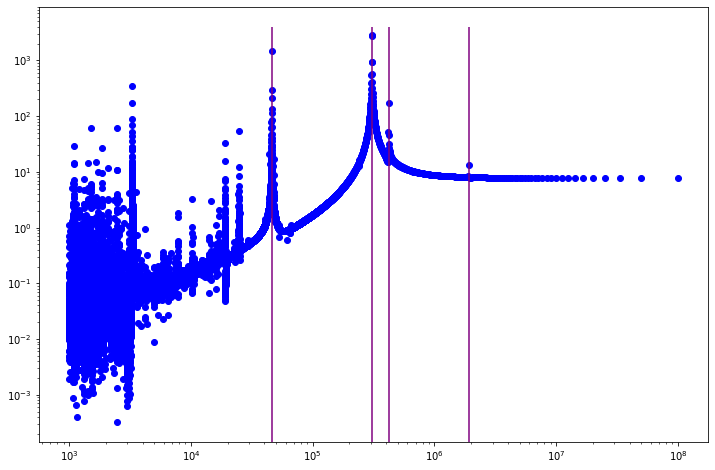

In [22]:
plt.figure(figsize=(12,8))
xs = [1,4000]
plt.vlines(x = [1/freq[ihumax], 1/freq[ihnmax], 1/freq[ihsmax], 1/freq[ihjmax]], ymin = 0, ymax = max(xs),
           colors = 'purple',
           label = 'vline_multiple - full height')
plt.scatter(1/freq[1:],pYhj[1:],label='particle',c='b')
plt.xscale('log')
plt.yscale('log')

100001 327
[-8.36205031e-05  8.02021116e-01  4.27867825e-01]


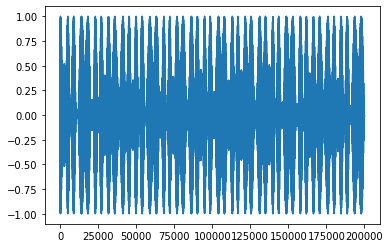

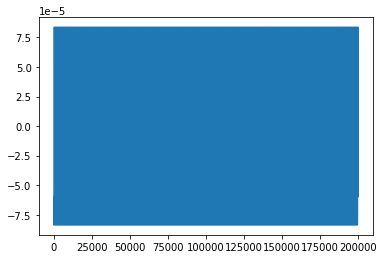

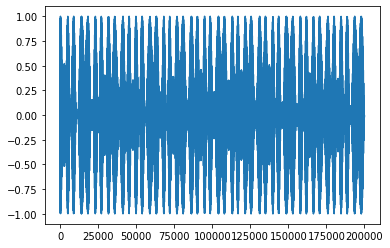

In [85]:
from scipy.optimize import minimize 
from scipy import stats
#x = np.linspace(-10, 30, 100)

print(len(pYhj),ihjmax)
x = t

#print(x)

# create a normally distributed residual
e = np.random.normal(10, 5, 100)

# generate ground truth
y = h

def MLE_Norm(parameters, freq):
    # extract parameters
    const, phase, std_dev = parameters
    # predict the output
    pred = const*np.sin(freq*2*np.pi*t+phase)
    #pred = const/beta/np.sqrt(2*np.pi)*np.exp(-0.5*((x-std_dev)/beta)**2)
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL

mle_model = minimize(MLE_Norm, np.array([1,0.5,2]), method='Nelder-Mead', args=freq[ihjmax])
print(mle_model.x)

plt.plot(y)
plt.show()
const = mle_model.x[0]
phase = mle_model.x[1]
std_dev = mle_model.x[2]

#const = 35000
#beta = 300
#std_dev = 5
guess = const*np.sin(freq[ihjmax]*2*np.pi*x+phase)
#print(guess)
plt.plot(guess)
plt.show()

plt.plot(y-guess)
